In [36]:
# here we load a pretrained MobilenetV2 model and get the feature map
# https://github.com/d-li14/mobilenetv2.pytorch
from torchvision import models
import torch
model = models.mobilenet_v2(pretrained=True)
# save the pretrained weight
torch.save(model.state_dict(), './Weights/pretrained_mobilenetv2_imagenet.pth')
# dataloader imagenet
from Dataloaders.dataloader_imagenet import Dataset_imagenet, Dataloader_imagenet
imagenet = Dataset_imagenet('home')
_, test, _ = imagenet.return_sampler()
_, test_set, _ = imagenet.return_dict()


test_loader = Dataloader_imagenet(test, test_set, transform = True)
test_loader = torch.utils.data.DataLoader(test_loader, batch_size=100, shuffle=True)
# get the first image
for image, label in test_loader:
    break
# forward pass
output = model(image)
# get the max
max_output = torch.argmax(output, dim=1)
print(max_output==label)

/home/tonypeng/anaconda3/envs/iot/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tonypeng/anaconda3/envs/iot/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor([ True,  True,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True, False,  True,  True,  True, False,  True,  True,
         True, False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True, False,
         True, False,  True,  True,  True,  True,  True,  True,  True, False])


In [41]:
from Models.mobilenetv2_original import stupid_model_splitter
import numpy as np
client, server = stupid_model_splitter(weight_path='./Weights/pretrained_mobilenetv2_imagenet.pth')
# forward pass
client_output = client(image)
# count zeros
result = np.sum(np.where(client_output==0, 1, 0))
print(result)
print(client_output.shape)
print(result/np.prod(client_output.shape))

# check is a channel is all zeros
zero_channels = 0
for i in range (client_output.shape[0]):
    for j in range (client_output.shape[1]):
        if torch.sum(client_output[i,j,:,:])==0:
            zero_channels+=1
print(zero_channels)

14194816
torch.Size([100, 32, 112, 112])
0.35362563775510203
409


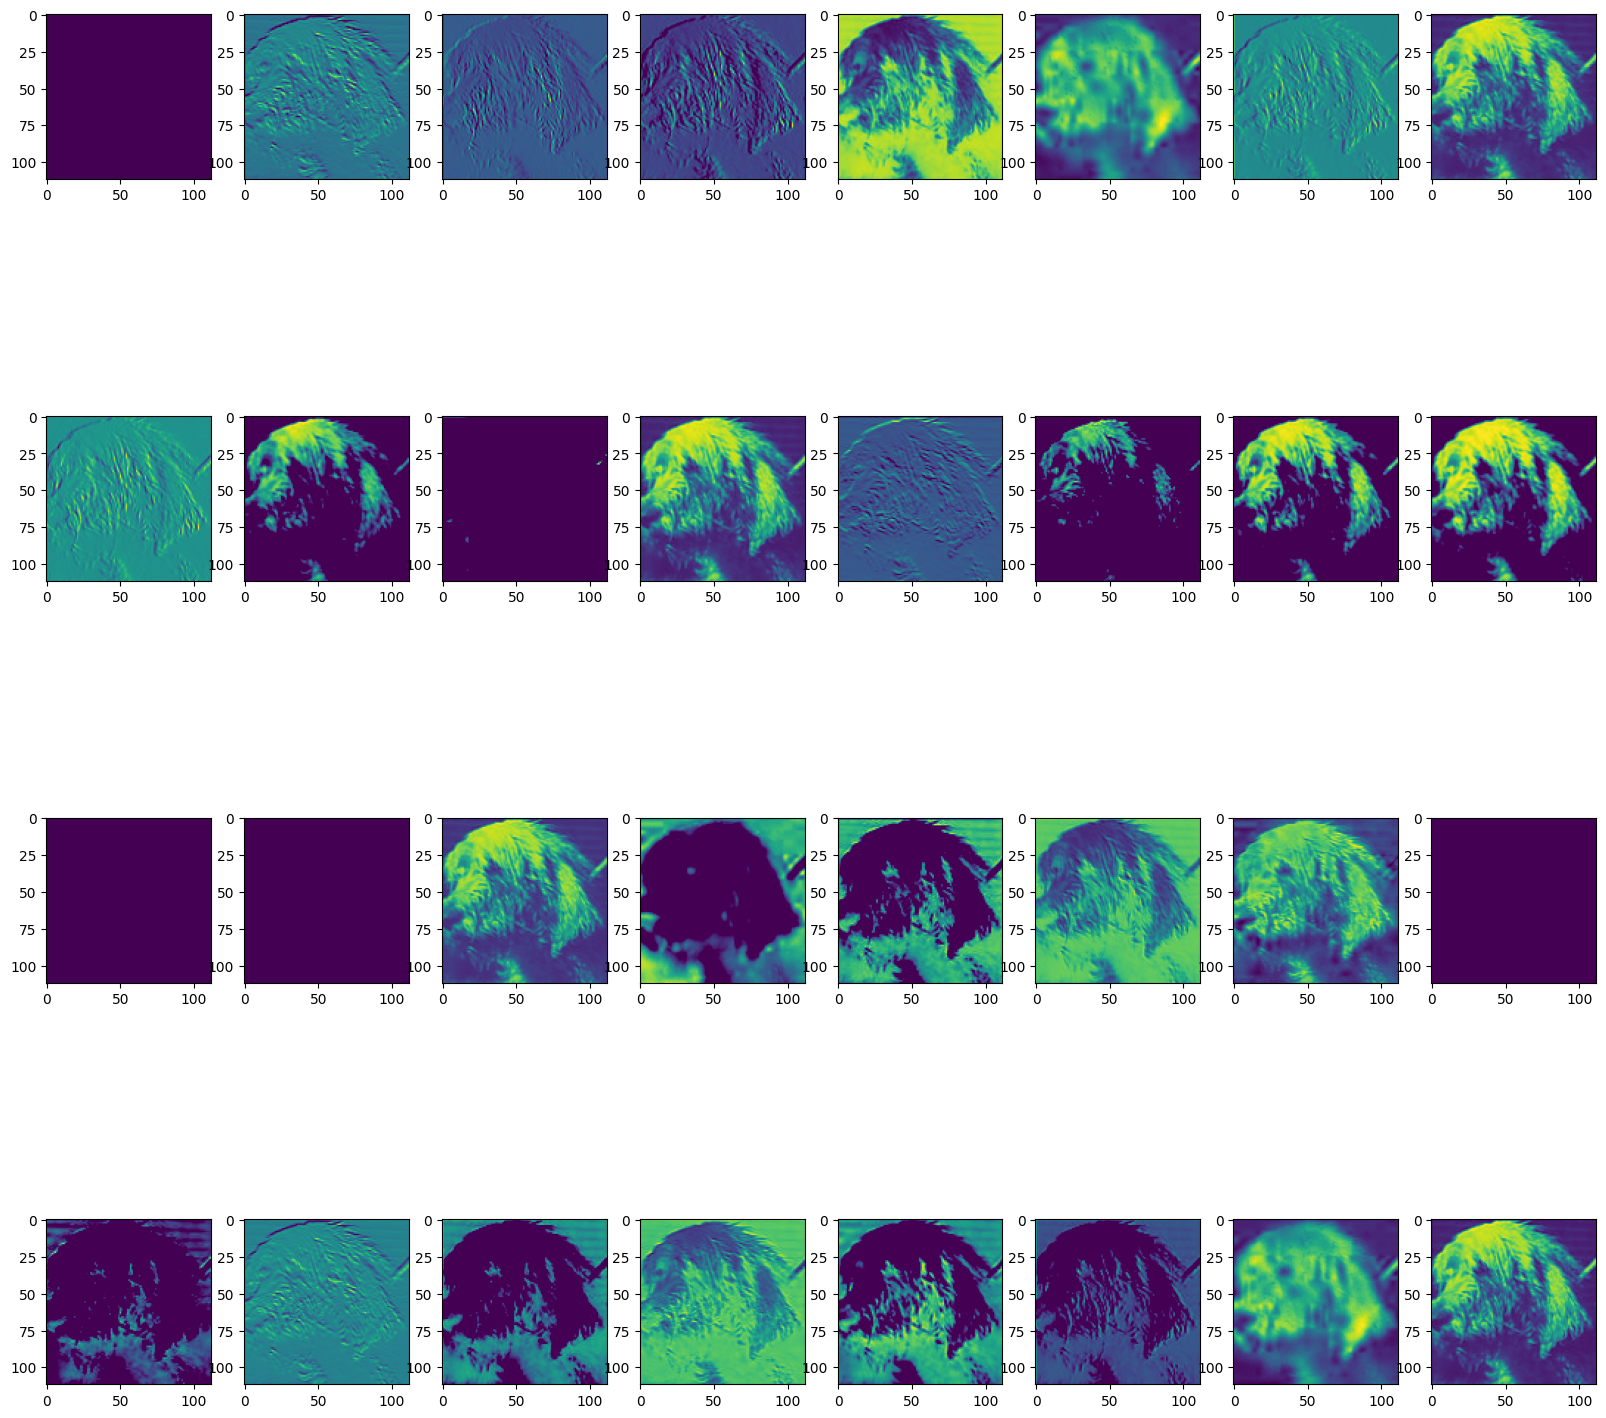

In [42]:
# plot the all feature map
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(4,8, figsize=(20,20))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(client_output[0,i*8+j,:,:].detach().numpy())

plt.show()